In [108]:
import pandas as pd
from pathlib import Path

In [109]:
df_train = pd.read_csv('train.csv')

In [111]:
df_train.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [114]:
df_train['source'].value_counts()

ethz_1       51489
arvalis_1    45716
rres_1       20236
arvalis_3    16665
usask_1       5807
arvalis_2     4179
inrae_1       3701
Name: source, dtype: int64

In [115]:
df_train.describe()

,width,height
count,147793.0,147793.0
mean,1024.0,1024.0
std,0.0,0.0
min,1024.0,1024.0
25%,1024.0,1024.0
50%,1024.0,1024.0
75%,1024.0,1024.0
max,1024.0,1024.0


In [116]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147793 entries, 0 to 147792
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   image_id  147793 non-null  object
 1   width     147793 non-null  int64 
 2   height    147793 non-null  int64 
 3   bbox      147793 non-null  object
 4   source    147793 non-null  object
dtypes: int64(2), object(3)
memory usage: 5.6+ MB


In [117]:
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:>

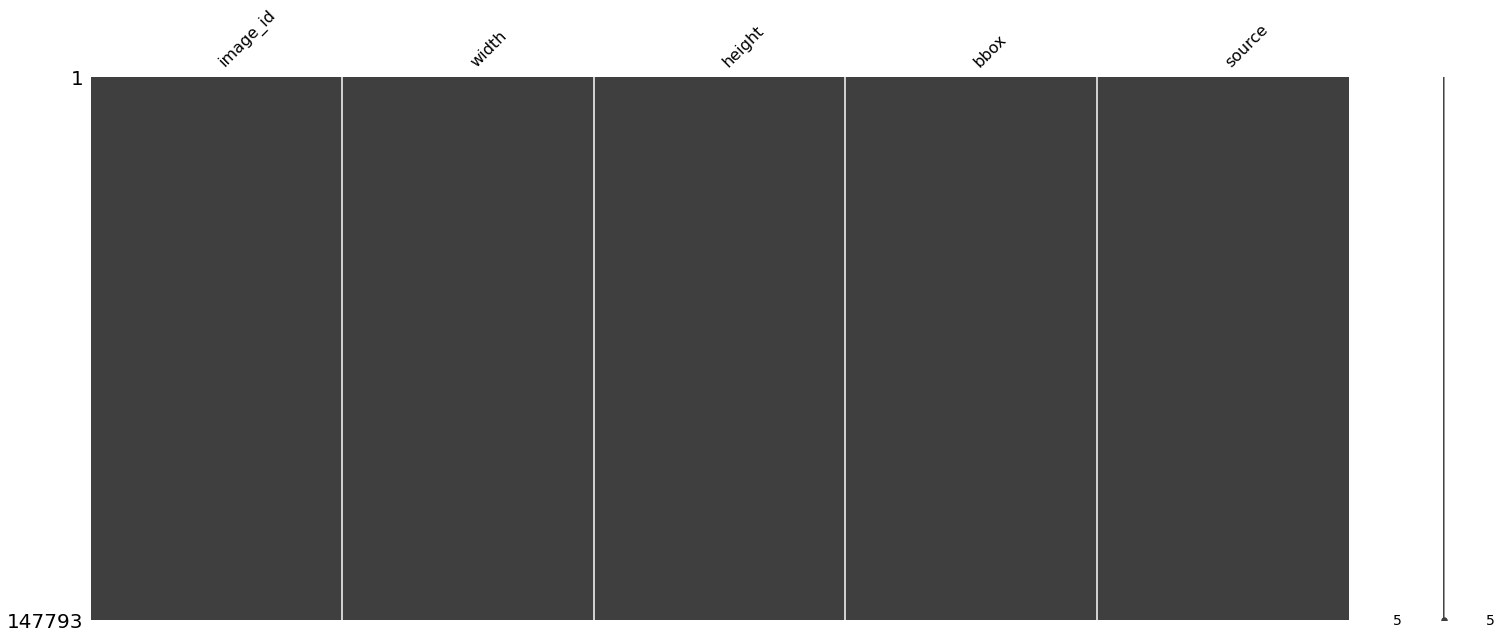

In [118]:
msno.matrix(df_train)

In [119]:
df_train['source'].value_counts()

ethz_1       51489
arvalis_1    45716
rres_1       20236
arvalis_3    16665
usask_1       5807
arvalis_2     4179
inrae_1       3701
Name: source, dtype: int64

In [120]:
source_value_counts = df_train['source'].value_counts()
source_index_values = source_value_counts.index
source_values = source_value_counts.index

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

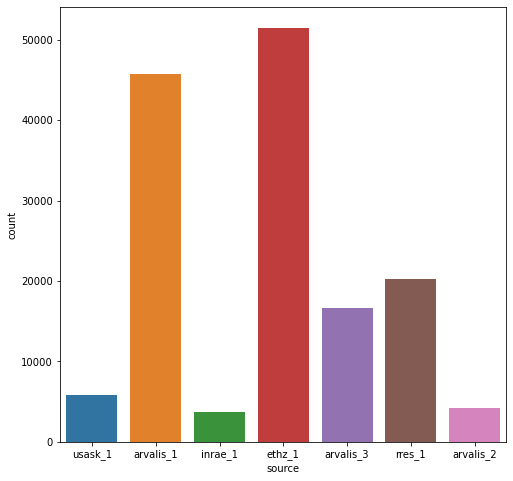

In [122]:
plt.figure(figsize = (8, 8))
sns.countplot(x = df_train['source'], data = df_train)
plt.show()

In [123]:
df_train['source'].value_counts().values

array([51489, 45716, 20236, 16665,  5807,  4179,  3701], dtype=int64)

In [124]:
import seaborn as sns
from glob import glob

In [125]:
TRAIN_PATH = '../Wheat Detection Dataset/train/'
TEST_PATH = '../Wheat Detection Dataset/test/'

TRAIN_IMAGES = glob(TRAIN_PATH + '*')
TEST_IMAGES = glob(TEST_PATH + '*')

In [126]:
TRAIN_IMAGES[0: 5]

['../Wheat Detection Dataset/train\\00333207f.jpg',
 '../Wheat Detection Dataset/train\\005b0d8bb.jpg',
 '../Wheat Detection Dataset/train\\006a994f7.jpg',
 '../Wheat Detection Dataset/train\\00764ad5d.jpg',
 '../Wheat Detection Dataset/train\\00b5c6764.jpg']

In [127]:
TEST_IMAGES[0: 5]

['../Wheat Detection Dataset/test\\2fd875eaa.jpg',
 '../Wheat Detection Dataset/test\\348a992bb.jpg',
 '../Wheat Detection Dataset/test\\51b3e36ab.jpg',
 '../Wheat Detection Dataset/test\\51f1be19e.jpg',
 '../Wheat Detection Dataset/test\\53f253011.jpg']

In [128]:
print("The length of the training data is: {}".format(len(TRAIN_IMAGES)))
print("The length of the test data is: {}".format(len(TEST_IMAGES)))

The length of the training data is: 3422
The length of the test data is: 10


In [129]:
sample_submission = pd.read_csv("sample_submission.csv")

In [130]:
sample_submission.head()

,image_id,PredictionString
0,aac893a91,1.0 0 0 50 50
1,51f1be19e,1.0 0 0 50 50
2,f5a1f0358,1.0 0 0 50 50
3,796707dd7,1.0 0 0 50 50
4,51b3e36ab,1.0 0 0 50 50


In [131]:
plt.imread(TRAIN_PATH + '00333207f.jpg')[0: 2]

array([[[236, 238, 141],
        [234, 236, 139],
        [233, 233, 137],
        ...,
        [ 72,  59,   6],
        [ 71,  60,   6],
        [ 90,  79,  25]],

       [[239, 237, 150],
        [238, 236, 149],
        [237, 235, 148],
        ...,
        [ 75,  61,  12],
        [ 68,  56,   6],
        [ 73,  61,  11]]], dtype=uint8)

In [132]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import activations

In [133]:
model = Sequential([Dense(200, input_dim = 64),
                   Activation(activations.relu),
                   Dropout(0.2),
                   Dense(4)])

In [134]:
from tqdm import tqdm

In [135]:
import cv2

In [141]:
from tensorflow.keras.applications import Xception
import warnings
warnings.filterwarnings("ignore")

In [144]:
len(df_train)

147793

In [146]:
df_train_sampled = df_train.sample(frac = 0.01)

In [148]:
len(df_train_sampled)

1478

In [150]:
df_train_sampled.head()

,image_id,width,height,bbox,source
112838,0ebac9a23,1024,1024,"[417.0, 642.0, 207.0, 79.0]",arvalis_3
44040,ed88cccdc,1024,1024,"[90, 330, 73, 103]",arvalis_1
140339,96b19d664,1024,1024,"[0.0, 646.0, 113.0, 71.0]",rres_1
16930,87196861b,1024,1024,"[60.0, 105.0, 49.0, 127.0]",arvalis_1
138952,630b12b1a,1024,1024,"[808.0, 612.0, 88.0, 150.0]",rres_1


In [151]:
images = []
classID = []
for image_id, class_name  in tqdm(df_train_sampled[['image_id', 'source']].values):
    img = cv2.imread(TRAIN_PATH + '/{}.jpg'.format(image_id), cv2.IMREAD_COLOR)
    if type(image_id) == None:
        continue
    else:
        images.append(img)
        classID.append(class_name)

100%|██████████████████████████████████████████████████████████████████████████████| 1478/1478 [00:16<00:00, 88.08it/s]


In [155]:
images[0]

array([[[ 11,  34,  30],
        [ 12,  35,  31],
        [ 12,  35,  31],
        ...,
        [156, 207, 209],
        [151, 199, 201],
        [148, 196, 198]],

       [[ 11,  34,  30],
        [ 11,  34,  30],
        [ 12,  35,  31],
        ...,
        [155, 206, 208],
        [150, 199, 201],
        [149, 197, 199]],

       [[ 12,  35,  31],
        [ 12,  35,  31],
        [ 13,  34,  31],
        ...,
        [153, 204, 206],
        [149, 198, 200],
        [148, 197, 199]],

       ...,

       [[ 12,  30,  13],
        [ 17,  35,  18],
        [ 45,  64,  47],
        ...,
        [  2,  10,   9],
        [  6,  12,  11],
        [  6,  12,  11]],

       [[ 14,  33,  14],
        [ 20,  39,  20],
        [ 50,  70,  51],
        ...,
        [  0,   4,   5],
        [  2,   6,   7],
        [  3,   7,   8]],

       [[ 17,  36,  17],
        [ 20,  39,  20],
        [ 46,  66,  47],
        ...,
        [  0,   2,   3],
        [  2,   4,   5],
        [  4,   6,   7]]

In [156]:
from sklearn.preprocessing import LabelEncoder

In [157]:
encoder = LabelEncoder()
y = df_train_sampled['source']
y_converted = encoder.fit_transform(y)

In [160]:
from tensorflow.keras.utils import to_categorical

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
y_categorical = to_categorical(y_converted)

In [163]:
y_categorical

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [169]:
X = df_train_sampled.drop(['source'], axis = 1).values

In [170]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [177]:
model = Sequential()
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [184]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y_categorical, random_state = 50, test_size = 0.3)

In [187]:
import numpy as np

In [189]:
X_train[0]

array(['4d0e29915', 1024, 1024, '[559.0, 765.0, 155.0, 31.0]'],
      dtype=object)

In [186]:
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

ValueError: could not convert string to float: '4d0e29915'

In [179]:
len(X_train)

1034

In [180]:
len(X_cv)

444

In [181]:
model.fit(X_train, y_train)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).